# Doing it on my own, no cheating.....

In [292]:
import torch
from torch import nn #neural network
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [293]:
X, y = make_circles(n_samples=1000, random_state=42)

In [294]:
X[:5], y[:5]

(array([[ 0.77230531,  0.20867321],
        [-0.78934876,  0.13010973],
        [-0.79369176,  0.10026659],
        [-0.34062343,  0.72386164],
        [ 0.43711577, -0.89940525]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [295]:
import pandas as pd

X_dataframe = pd.DataFrame({'x1':X[:,0],'x2':X[:,1], 'label':y})

X_dataframe.head(10)

,x1,x2,label
0,0.772305,0.208673,1
1,-0.789349,0.130110,1
2,-0.793692,0.100267,1
3,-0.340623,0.723862,1
4,0.437116,-0.899405,0
5,-0.494288,0.629031,1
6,-0.010053,0.799937,1
7,0.789349,0.130110,1
8,-0.159768,-0.783884,1
9,-0.137790,0.990461,0


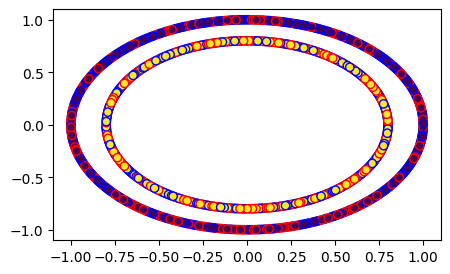

In [296]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))

plt.scatter(x=X_dataframe['x1'],y=X_dataframe['x2'], c = y, edgecolors=('red','blue'))

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [298]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [299]:
class classifyingCircles(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(in_features=2, out_features=5 ),
                                   nn.Linear(in_features=5, out_features=1))

    def forward(self, x : torch.Tensor) ->torch.Tensor:
        return torch.tanh(self.layer(torch.tanh(x)))

In [300]:
# initialising model
modelv0 = classifyingCircles()

modelv0.state_dict()

OrderedDict([('layer.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer.0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer.1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer.1.bias', tensor([-0.2060]))])

In [301]:
X_train.dtype

dtype('float64')

In [302]:
# Converting data to tensors
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test  = torch.from_numpy(y_test).type(torch.float)

X_train.dtype

torch.float32

In [303]:
# making predictions on untrained model

with torch.inference_mode():
    predictions = modelv0(X_test)

In [304]:
def plot(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, prediction = None):

    plt.figure(figsize=(5,3))
    # plt.scatter(x = X_train[:,0],y = y_train, c='r', label='train_data')
    # plt.scatter(x = X_train[:,1],y = y_train, c='r', label='train_data')
    # plt.scatter(x = X_test[:,0],y = y_test, c = 'b', label='test_data')
    # plt.scatter(x = X_test[:,1],y = y_test, c = 'b', label='test_data')
    if prediction is not None:
        plt.plot(prediction[:,0],y_test, c='r', label='prediction')
        plt.plot(y_test,y_test, c='b', label='actual values')

    plt.legend()

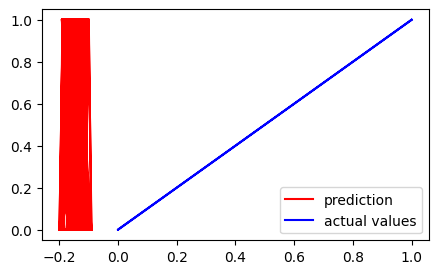

In [305]:
plot(prediction = predictions)

In [306]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adamax(params=(X_train, y_train), lr = 0.1)

In [307]:
y_test.shape, predictions.reshape(200).shape

(torch.Size([200]), torch.Size([200]))

In [308]:
# Creating a training loop
random_seed = 42

torch.manual_seed(random_seed)

epochs = 1000
train_loss = []
test_loss = []
for epoch in range(epochs):
    modelv0.train()
    y_preds = modelv0(X_train).reshape(800)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    modelv0.eval()
    with torch.inference_mode():
        test_pred = modelv0(X_test).reshape(200)
        t_loss = loss_fn(test_pred, y_test)
        train_loss.append(loss)
        test_loss.append(t_loss)
        if epoch%10 == 0:
            print(f"Epoch : {epoch}, loss : {loss}, test loss : {t_loss}")

Epoch : 0, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 10, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 20, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 30, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 40, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 50, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 60, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 70, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 80, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 90, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 100, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 110, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 120, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 130, loss : 0.6670182943344116, test loss : 0.6656224131584167
Epoch : 140, loss